In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

from yahoo_finance.api import (get_historic_data,
                                    get_most_active_stocks,
                                    get_upcoming_earnings_data,
                                    get_upcoming_stock_splits_data)
from yahoo_finance.utils import plot_ma

### Get historic data for any stock by passing start and end dates.

In [3]:
d = get_historic_data(ticker='ICON.L',start_date='2021-02-01',end_date='2021-03-01')
d.shape
d.head()

2021-03-03 21:06:03,936 https://query1.finance.yahoo.com/v7/finance/download/ICON.L?period1=1612137600&period2=1614556800&interval=1d&events=history&includeAdjustedClose=true
2021-03-03 21:06:03,946 Attempting to source data from Yahoo.
2021-03-03 21:06:04,101  Data Sourced. There are 20 rows and date range is 2021-02-01 : 2021-02-26 


(20, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-01,0.004,0.004,0.002,0.003,0.003,393709836
2021-02-02,0.003,0.003,0.003,0.003,0.003,396


### Get data on UK Most active stock.

#### Default implementation gets first 100 rows

In [2]:
d  = get_most_active_stocks()
d.shape
d.head()

2021-03-03 21:05:46,110 NumExpr defaulting to 2 threads.


(100, 10)

,Symbol,Name,Price (intraday),Change,% change,Volume,Avg vol (3-month),Market Cap,PE ratio (TTM),52-week range
0,ICON.L,Iconic Labs Plc,0.0079,0.0026,+49.06%,1.13B,405.057M,2.955M,NaN,NaN
1,SNT.L,Sabien Technology Group Plc,0.1250,0.0075,+6.38%,634.978M,147.462M,5.465M,NaN,NaN
2,VAST.L,Vast Resources plc,0.0951,-0.0049,-4.90%,349.295M,235.859M,20.257M,NaN,NaN
3,MOGP.L,Mountfield Group Plc,0.3300,-0.2200,-40.00%,311.234M,142366,839005,3.30,NaN
4,LLOY.L,Lloyds Banking Group plc,40.4200,1.5300,+3.95%,287.422M,239.25M,28.638B,33.68,NaN


#### By setting default to false, function will scrape all records.

In [4]:
full = get_most_active_stocks(default=False)
full.shape

2021-03-03 21:06:19,602 There are total of 1171 records to pull
2021-03-03 21:06:19,604 Getting data for off_set 0
2021-03-03 21:06:20,404 Sleeping for five seconds
2021-03-03 21:06:25,411 Getting data for off_set 100
2021-03-03 21:06:26,345 Sleeping for five seconds
2021-03-03 21:06:31,352 Getting data for off_set 200
2021-03-03 21:06:32,136 Sleeping for five seconds
2021-03-03 21:06:37,143 Getting data for off_set 300
2021-03-03 21:06:37,761 Sleeping for five seconds
2021-03-03 21:06:42,771 Getting data for off_set 400
2021-03-03 21:06:43,678 Sleeping for five seconds
2021-03-03 21:06:48,685 Getting data for off_set 500
2021-03-03 21:06:49,427 Sleeping for five seconds
2021-03-03 21:06:54,434 Getting data for off_set 600
2021-03-03 21:06:55,219 Sleeping for five seconds
2021-03-03 21:07:00,231 Getting data for off_set 700
2021-03-03 21:07:01,152 Sleeping for five seconds
2021-03-03 21:07:06,167 Getting data for off_set 800
2021-03-03 21:07:06,950 Sleeping for five seconds
2021-03-03 

(1171, 10)

In [5]:
full.head(2)

,Symbol,Name,Price (intraday),Change,% change,Volume,Avg vol (3-month),Market Cap,PE ratio (TTM),52-week range
0,ICON.L,Iconic Labs Plc,0.0079,0.0026,+49.06%,1.13B,405.057M,2.955M,NaN,NaN
1,SNT.L,Sabien Technology Group Plc,0.1250,0.0075,+6.38%,634.978M,147.462M,5.465M,NaN,NaN


### Get upcoming earnings as of a date

In [3]:
get_upcoming_earnings_data('2021-03-07')

2021-03-03 19:52:19,305 Getting earnings data for 2021-03-07
2021-03-03 19:52:19,949 NumExpr defaulting to 2 threads.


,Symbol,Company,Earnings call time,EPS estimate,Reported EPS,Surprise (%)
0,CWD.L,Countrywide PLC,TAS,-,-,-
1,DLG.L,Direct Line Insurance Group PLC,TAS,-,-,-
2,DGOC.L,Diversified Gas & Oil PLC,TAS,-,-,-


### Get upcoming stock splits as of a date

In [3]:
get_upcoming_stock_splits_data('2021-03-04')

2021-03-03 21:23:01,545 Getting earnings data for 2021-03-04
2021-03-03 21:23:02,212 NumExpr defaulting to 2 threads.


,Symbol,Company,Payable on,Optionable?,Ratio
0,TZ3.DU,Tootsie Roll Industries Inc,04 Mar 2021,N,100.00 - 103.00
1,0140.KL,Macpie Bhd,04 Mar 2021,N,1.00 - 2.00
2,TZ3.F,Tootsie Roll Industries Inc,04 Mar 2021,N,100.00 - 103.00
3,TZ3.SG,Tootsie Roll Industries Inc,04 Mar 2021,N,100.00 - 103.00
4,VONE-N0000.CM,Vallibel One PLC,04 Mar 2021,N,20.00 - 21.00
5,TROLB,Tootsie Roll Industries Inc,04 Mar 2021,N,100.00 - 103.00
6,MYBF,Muncy Bank Financial Inc,04 Mar 2021,N,100.00 - 105.00
7,TR,Tootsie Roll Industries Inc,04 Mar 2021,N,100.00 - 103.00


### Provided a dataframe with stock prices, create and plot moving averages.

In [4]:
dl =get_historic_data('DLG.L','2021-01-15','2021-03-03')

2021-03-03 21:27:37,708 https://query1.finance.yahoo.com/v7/finance/download/DLG.L?period1=1610668800&period2=1614729600&interval=1d&events=history&includeAdjustedClose=true
2021-03-03 21:27:37,710 Attempting to source data from Yahoo.
2021-03-03 21:27:37,894  Data Sourced. There are 33 rows and date range is 2021-01-15 : 2021-03-02 


In [5]:
dl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-15,326.500000,331.500000,324.700012,329.500000,329.500000,3344834
2021-01-18,334.000000,334.000000,327.200012,327.399994,327.399994,1886211
2021-01-19,329.399994,329.399994,323.100006,324.700012,324.700012,3117639
2021-01-20,321.799988,326.500000,321.799988,324.399994,324.399994,2624292
2021-01-21,320.100006,327.100006,320.100006,321.799988,321.799988,2949720


2021-03-03 21:27:53,555 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-03-03 21:27:53,562 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-03-03 21:27:53,589 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-03-03 21:27:53,593 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-03-03 21:27:53,597 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be p

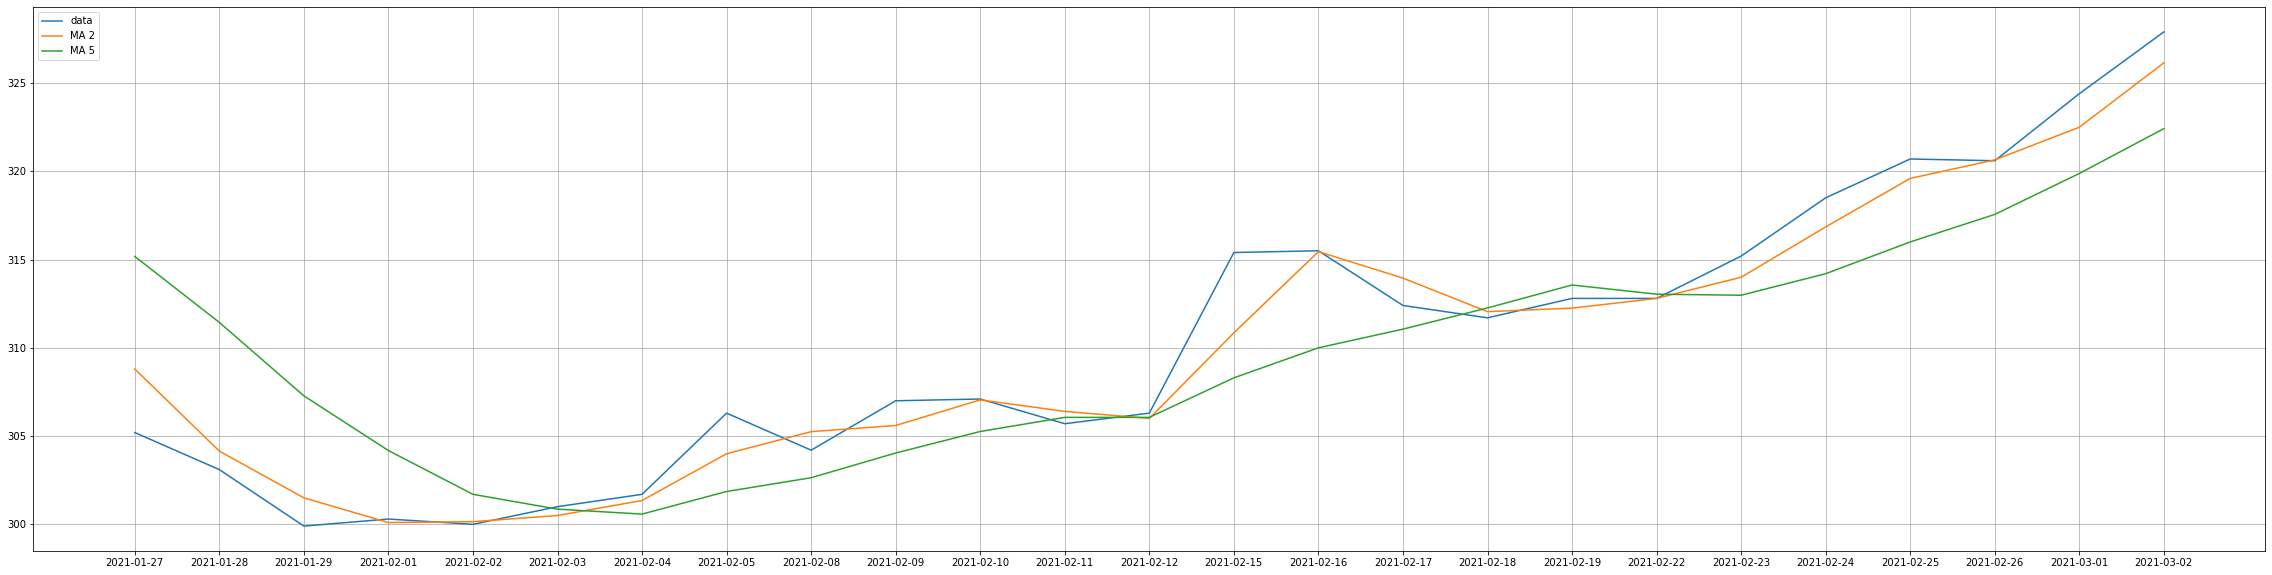

In [8]:
plot_ma(dl,[2,5])